In [2]:
import numpy as np
import pandas as pd                                       
import matplotlib.pyplot as plot                # we will import multiple modules so that we can perform task on our data easily
import seaborn as sb
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('C:/Users/karti/Downloads/new_dataset.csv', sep=',', encoding='ISO-8859-1', header=0) # pandas extract file from the location

In [4]:
data.head(10)    # shows first 10 rows from the total number of columns

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,09-06-2014,14-06-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,09-06-2014,14-06-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,09-06-2014,14-06-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,09-06-2014,14-06-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,09-06-2014,14-06-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [5]:
data.info()        # .info() shows datatype of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RowID         9994 non-null   int64  
 1   OrderID       9994 non-null   object 
 2   OrderDate     9994 non-null   object 
 3   ShipDate      9994 non-null   object 
 4   ShipMode      9994 non-null   object 
 5   CustomerID    9994 non-null   object 
 6   CustomerName  9994 non-null   object 
 7   Segment       9994 non-null   object 
 8   Country       9994 non-null   object 
 9   City          9994 non-null   object 
 10  State         9994 non-null   object 
 11  PostalCode    9994 non-null   int64  
 12  Region        9994 non-null   object 
 13  ProductID     9994 non-null   object 
 14  Category      9994 non-null   object 
 15  Sub-Category  9994 non-null   object 
 16  ProductName   9994 non-null   object 
 17  Sales         9994 non-null   float64
 18  Quantity      9994 non-null 

In [6]:
data['CustomerID'] = data['CustomerID'].astype(str)    # we will convert 'CustomerID' as string datatype for further calculation

In [7]:
data_null_values = round(100*(data.isnull().sum())/len(data),2)    # we will find if there is any null value present in our data
data_null_values

RowID           0.0
OrderID         0.0
OrderDate       0.0
ShipDate        0.0
ShipMode        0.0
CustomerID      0.0
CustomerName    0.0
Segment         0.0
Country         0.0
City            0.0
State           0.0
PostalCode      0.0
Region          0.0
ProductID       0.0
Category        0.0
Sub-Category    0.0
ProductName     0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

In [8]:
# data['TotalAmount'] = data['Quantity']*data['PriceperUnit']
rfm_m = data.groupby('CustomerID')['Sales'].sum()      # we will make group of 'CustomerID' and 'Sales'
rfm_m = rfm_m.reset_index()
rfm_m.head()                                           # this will show us how much sales in done per customer

,CustomerID,Sales
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5086.935
4,AB-10015,886.156


In [9]:
rfm_f = data.groupby('CustomerID')['OrderID'].count()    # In this we will make group of 'CustomerID' and 'OrderID'
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID','Frequency']               # define those columns as 'CustomerID' and 'Frequency'
rfm_f.head()                                             # this will show us how frequently is customer visiting

,CustomerID,Frequency
0,AA-10315,11
1,AA-10375,15
2,AA-10480,12
3,AA-10645,18
4,AB-10015,6


In [10]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')     # we will merge both columns 'Sales' and 'Frequency'
rfm.head()

,CustomerID,Sales,Frequency
0,AA-10315,5563.560,11
1,AA-10375,1056.390,15
2,AA-10480,1790.512,12
3,AA-10645,5086.935,18
4,AB-10015,886.156,6


In [11]:
data['OrderDate'] = pd.to_datetime(data['OrderDate'], format = '%d-%m-%Y')   # we will change the format of the date to day-month-year

In [12]:
maxdate = max(data['OrderDate'])     # this will show us max date from the dataset
maxdate

Timestamp('2017-12-30 00:00:00')

In [13]:
maxsales = max(data['Sales'])        # this will show us max sales from the 'Sales' column
maxsales

22638.48

In [14]:
data['Difference_Date'] = maxdate - data['OrderDate']  # From this we can find the recency, which means how many days did customer took to visit the shop
data.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,Difference_Date
0,1,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,417 days
1,2,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,417 days
2,3,CA-2016-138688,2016-06-12,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,566 days
3,4,US-2015-108966,2015-10-11,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,811 days
4,5,US-2015-108966,2015-10-11,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,811 days


In [15]:
rfm_p = data.groupby('CustomerID')['Difference_Date'].min()   # this will display the days took by a single customer to visit
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Difference_Date
0,AA-10315,184 days
1,AA-10375,19 days
2,AA-10480,259 days
3,AA-10645,55 days
4,AB-10015,415 days


In [16]:
rfm_p['Difference_Date'] = rfm_p['Difference_Date'].dt.days  # we will take round figure of 'Difference_Date' to perform calculation 
rfm_p.head()

,CustomerID,Difference_Date
0,AA-10315,184
1,AA-10375,19
2,AA-10480,259
3,AA-10645,55
4,AB-10015,415


In [17]:
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')       # merging all 4 columns
rfm.columns = ['CustomerID','Sales','Frequency','Recency']
rfm.head()

,CustomerID,Sales,Frequency,Recency
0,AA-10315,5563.560,11,184
1,AA-10375,1056.390,15,19
2,AA-10480,1790.512,12,259
3,AA-10645,5086.935,18,55
4,AB-10015,886.156,6,415


Text(0.5, 0, 'Attributes')

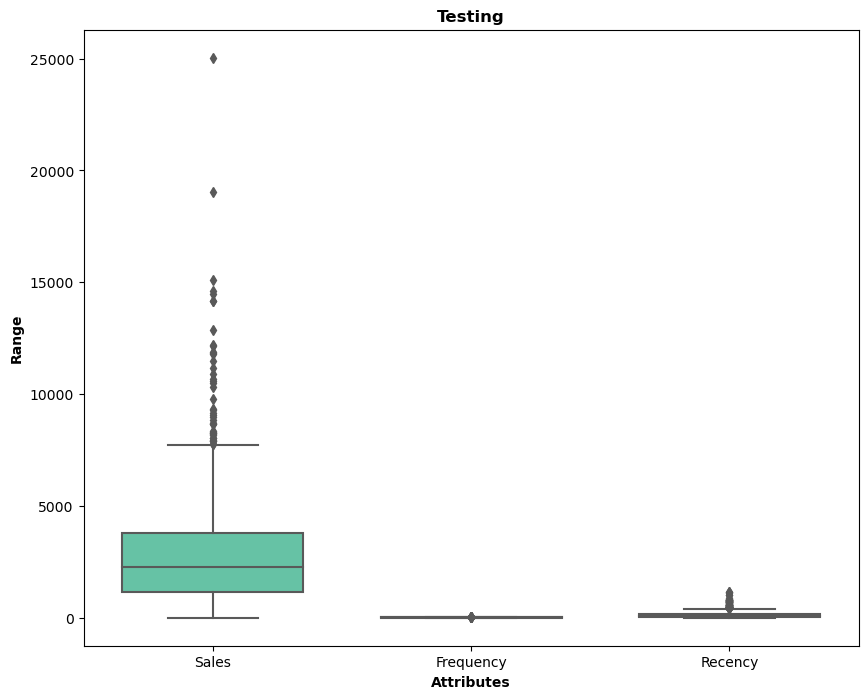

In [18]:
attributes = ['Sales','Frequency','Recency']     # defining attributes
plot.rcParams['figure.figsize'] = [10,8]         # defining the size of the chart
sb.boxplot(data = rfm[attributes], orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)  # ploting the data of attributes
plot.title("Testing",fontweight='bold')
plot.ylabel("Range",fontweight='bold')
plot.xlabel("Attributes",fontweight='bold')
# plot.ylim(0, 30000)

In [19]:
# Removing the outliers from the Sales
q1 = rfm.Sales.quantile(0.05)
q3 = rfm.Sales.quantile(0.95)
iqr = q3 - q1
rfm = rfm[(rfm.Sales >= q1 - 1.5*iqr) & (rfm.Sales <= q3 + 1.5*iqr)]

# Removing the outliers from the Recency
q1 = rfm.Recency.quantile(0.05)
q3 = rfm.Recency.quantile(0.95)
iqr = q3 - q1
rfm = rfm[(rfm.Recency >= q1 - 1.5*iqr) & (rfm.Recency <= q3 + 1.5*iqr)]

# Removing the outliers from the Frequency
q1 = rfm.Frequency.quantile(0.05)
q3 = rfm.Frequency.quantile(0.95)
iqr = q3 - q1
rfm = rfm[(rfm.Frequency >= q1 - 1.5*iqr) & (rfm.Frequency <= q3 + 1.5*iqr)]

# Outliers are errors present in dataset

In [20]:
# scaling the data to avoid large data to be biased and rest of all to be non-biased

rfm_df = rfm[['Sales','Frequency','Recency']]

scaler = StandardScaler()

rfm_df_scaled = scaler.fit_transform(rfm_df)      # scaler will train the model to be non-biased
rfm_df_scaled.shape

(792, 3)

In [21]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Sales','Frequency','Recency']

In [22]:
# We can define multiple clusters as per our needs

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [23]:
kmeans.labels_   # this will label the data in the format of clusters.

array([3, 2, 2, 3, 1, 0, 0, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 1, 3, 2, 2, 2,
       3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 0, 3, 3, 3, 2, 2, 2, 3, 1, 3,
       3, 2, 2, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 0,
       3, 3, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 0, 2, 2, 2, 2, 2,
       0, 3, 0, 2, 0, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 0, 3, 2, 1, 3, 2,
       1, 2, 1, 1, 2, 3, 1, 2, 3, 2, 2, 1, 3, 2, 3, 0, 2, 3, 1, 2, 3, 0,
       3, 2, 2, 2, 3, 1, 2, 2, 2, 1, 2, 1, 1, 1, 0, 3, 2, 3, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 1, 0, 1, 3, 1, 3, 3, 2, 1, 2, 2, 2, 2, 3, 1, 2, 3,
       3, 3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 1, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2,
       2, 3, 2, 2, 1, 1, 2, 3, 1, 1, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3,
       2, 3, 2, 0, 3, 1, 2, 2, 2, 3, 3, 1, 3, 0, 0, 3, 3, 2, 3, 2, 3, 2,
       2, 2, 0, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 3, 1, 2, 3, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 0, 1, 2, 3, 3, 3, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 3, 3, 2, 1,

In [24]:
set(kmeans.labels_)   # it confirms that we have successfully made 4 clusters

{0, 1, 2, 3}

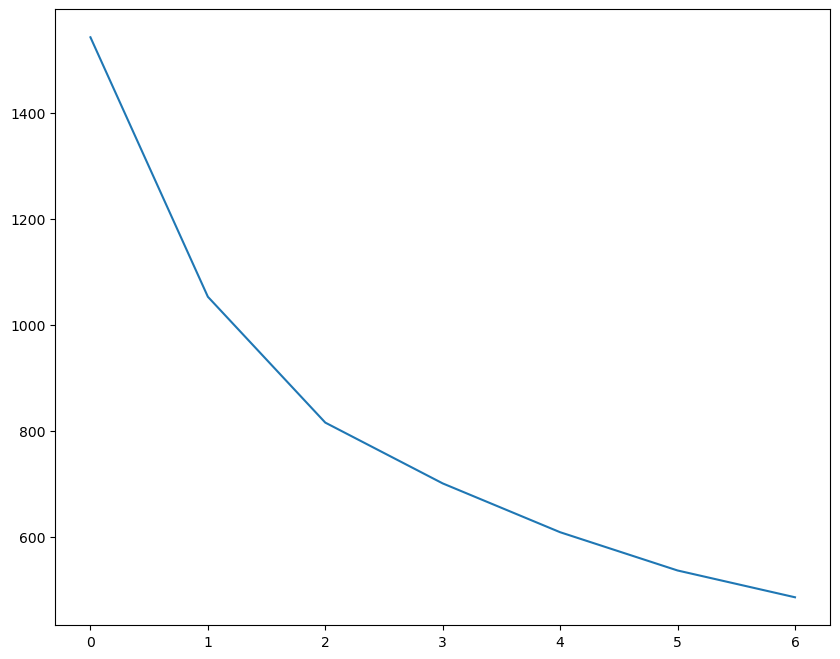

In [25]:
ssd = []                                                  # Empty List
range_n = [2,3,4,5,6,7,8]                                 # Defining the range of clusters
for num_clusters in range_n:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)  # It is going to create multiple objects based on clusters
    kmeans.fit(rfm_df_scaled)                             # Training model multiple times
    
    ssd.append(kmeans.inertia_)                           # It will shows the difference between two points from a single cluster
    
plot.plot(ssd)

In [26]:
# Finally after observing the chart we can say that we require only 3 clusters.

kmeans = KMeans(n_clusters=3, max_iter=300)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=3)

In [27]:
rfm['ClusterID'] = kmeans.predict(rfm_df_scaled)  # Combing the 'ClusterId' column and predicting the 'ClusterID' for every customer
rfm.head()

,CustomerID,Sales,Frequency,Recency,ClusterID
0,AA-10315,5563.560,11,184,1
1,AA-10375,1056.390,15,19,0
2,AA-10480,1790.512,12,259,0
3,AA-10645,5086.935,18,55,1
4,AB-10015,886.156,6,415,2


<AxesSubplot:xlabel='ClusterID', ylabel='Sales'>

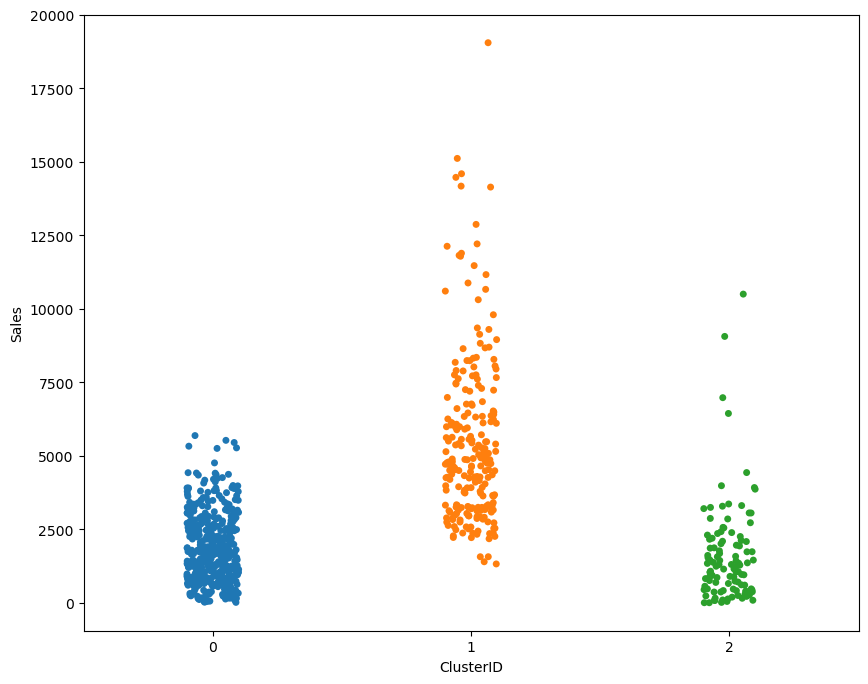

In [28]:
sb.stripplot(x='ClusterID', y='Sales', data=rfm)  # plotting the chart of 'Sales' based of 'ClusterId'

In [29]:
# Definig cluster_1_data as 'ClusterID 1'
cluster_1_data = rfm[rfm['ClusterID'] == 1]

# Merge 'original_data' with 'cluster_1_data' on 'CustomerID'
cluster_1_data_with_category = pd.merge(cluster_1_data, data[['CustomerID','Category']], on='CustomerID', how='left')

# Display the head of the merged DataFrame
cluster_1_data_with_category.head()


,CustomerID,Sales,Frequency,Recency,ClusterID,Category
0,AA-10315,5563.56,11,184,1,Office Supplies
1,AA-10315,5563.56,11,184,1,Office Supplies
2,AA-10315,5563.56,11,184,1,Office Supplies
3,AA-10315,5563.56,11,184,1,Office Supplies
4,AA-10315,5563.56,11,184,1,Office Supplies


In [30]:
# Count the total values present in 'Category'
category_counts = cluster_1_data_with_category['Category'].value_counts()

# Display the counts for each ship mode
category_counts

Office Supplies    2664
Furniture           966
Technology          887
Name: Category, dtype: int64

<AxesSubplot:xlabel='ClusterID', ylabel='Frequency'>

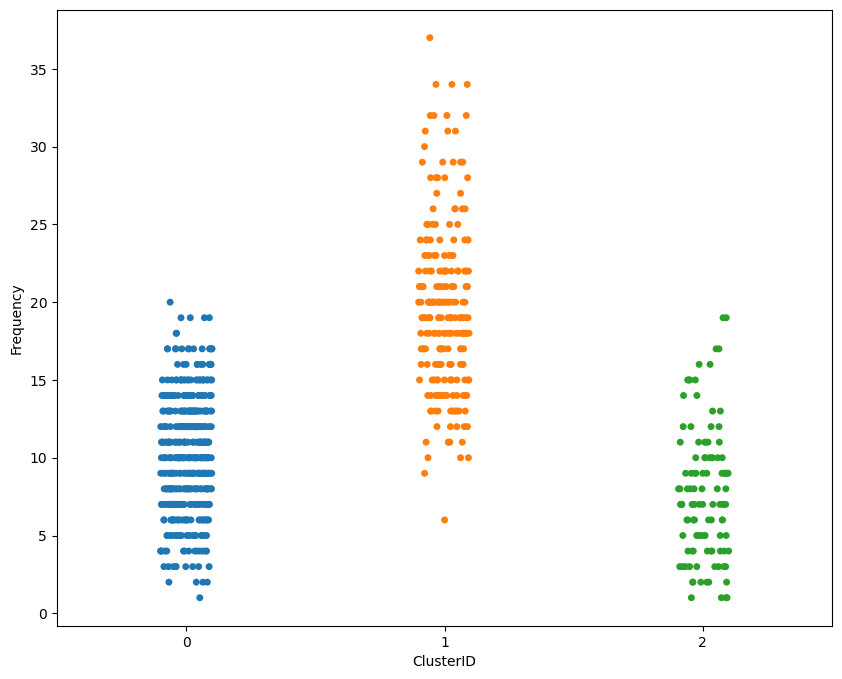

In [31]:
sb.stripplot(x='ClusterID', y='Frequency', data=rfm) # plotting the chart of 'Frequency' based of 'ClusterId'

In [32]:
# Definig cluster_1_data as 'ClusterID 0'
cluster_1_data = rfm[rfm['ClusterID'] == 1]

# Merge 'original_data' with 'cluster_1_data' on 'CustomerID'
cluster_1_data_with_category = pd.merge(cluster_1_data, data[['CustomerID','Category']], on='CustomerID', how='left')

# Display the head of the merged DataFrame
cluster_1_data_with_category.head()

,CustomerID,Sales,Frequency,Recency,ClusterID,Category
0,AA-10315,5563.56,11,184,1,Office Supplies
1,AA-10315,5563.56,11,184,1,Office Supplies
2,AA-10315,5563.56,11,184,1,Office Supplies
3,AA-10315,5563.56,11,184,1,Office Supplies
4,AA-10315,5563.56,11,184,1,Office Supplies


In [33]:
# Group the data by 'Frequency' and 'Category' and calculate the counts
category_counts = cluster_1_data_with_category.groupby(['CustomerID','Frequency', 'Category']).size()

# Display the counts for each frequency and category
category_counts.head(50)

CustomerID  Frequency  Category       
AA-10315    11         Furniture           1
                       Office Supplies     8
                       Technology          2
AA-10645    18         Furniture           8
                       Office Supplies     8
                       Technology          2
AB-10060    18         Furniture           3
                       Office Supplies    12
                       Technology          3
AB-10105    20         Furniture           3
                       Office Supplies    11
                       Technology          6
AC-10615    18         Furniture           4
                       Office Supplies    10
                       Technology          4
AD-10180    12         Furniture           3
                       Office Supplies     7
                       Technology          2
AG-10495    21         Furniture           3
                       Office Supplies    16
                       Technology          2
AG-10900    21  

In [34]:
# category_counts = cluster_1_data_with_category.groupby('ClusterID')['Frequency'].value_counts()
# category_counts.head()

<AxesSubplot:xlabel='ClusterID', ylabel='Recency'>

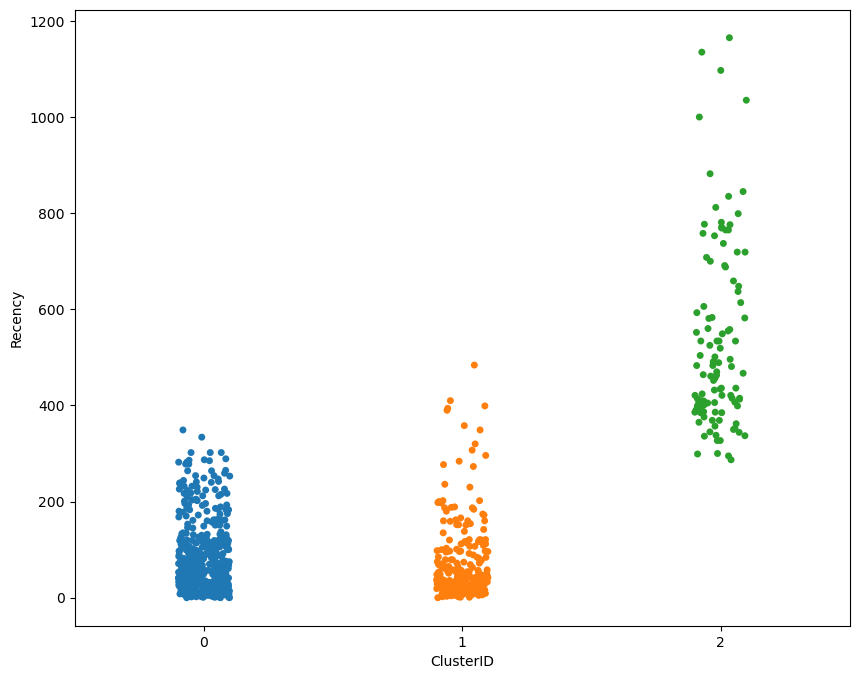

In [35]:
sb.stripplot(x='ClusterID', y='Recency', data=rfm) # plotting the chart of 'Recency' based of 'ClusterId'

In [36]:
# Definig cluster_1_data as 'ClusterID 2'
cluster_1_data = rfm[rfm['ClusterID'] == 0]

# Merge 'original_data' with 'cluster_1_data' on 'CustomerID'
cluster_1_data_with_category = pd.merge(cluster_1_data, data[['CustomerID','Category']], on='CustomerID', how='left')

# Display the head of the merged DataFrame
cluster_1_data_with_category.head()

,CustomerID,Sales,Frequency,Recency,ClusterID,Category
0,AA-10375,1056.39,15,19,0,Office Supplies
1,AA-10375,1056.39,15,19,0,Furniture
2,AA-10375,1056.39,15,19,0,Technology
3,AA-10375,1056.39,15,19,0,Office Supplies
4,AA-10375,1056.39,15,19,0,Office Supplies


In [39]:
# Group the data by 'Frequency' and 'Category' and calculate the counts
category_counts = cluster_1_data_with_category.groupby(['CustomerID','Recency', 'Category']).size()

# Display the counts for each frequency and category
category_counts.head(50)

CustomerID  Recency  Category       
AA-10375    19       Furniture           1
                     Office Supplies    11
                     Technology          3
AA-10480    259      Furniture           2
                     Office Supplies     8
                     Technology          2
AB-10150    41       Furniture           1
                     Office Supplies     9
                     Technology          2
AB-10165    25       Furniture           2
                     Office Supplies    10
                     Technology          2
AB-10255    166      Furniture           1
                     Office Supplies     9
                     Technology          4
AB-10600    50       Furniture           2
                     Office Supplies     3
                     Technology          3
AC-10420    232      Furniture           1
                     Office Supplies     4
AC-10450    11       Office Supplies     7
                     Technology          2
AC-10660    282  